In [1]:
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
import seaborn as sb

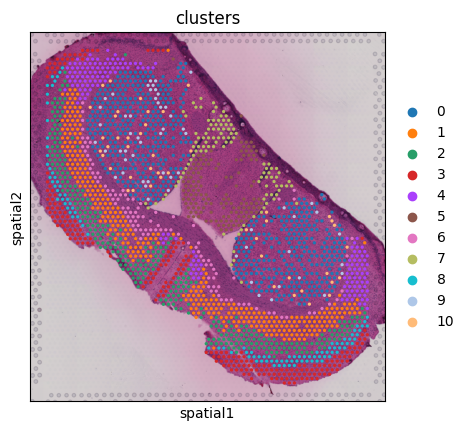

In [4]:
adata = sc.read_h5ad("I:\\mutiomics\\Spatial Multimodal Analysis of Transcriptomes and Metabolomes in Tissues\\m3\\m3_visium_ctrl.h5ad")
sc.pl.spatial(adata, img_key = "hires", color="clusters")
adata.obs["leiden"] = adata.obs["clusters"]

In [15]:
color_mapping = {
    0: 'blue',
    1: 'red',
    2: 'green',
    3: 'yellow',
    4: 'orange',
    5: 'purple',
    6: 'brown',
    7: 'pink',
    8: 'gray',
    9: 'cyan',
    10: 'black',
    11: 'white',
    12: 'magenta',
    13:'magenta',
}

(1000, 2500)


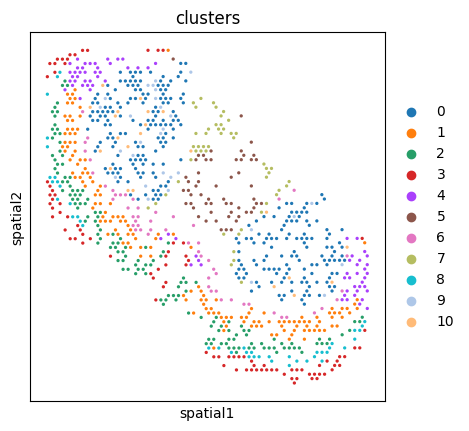

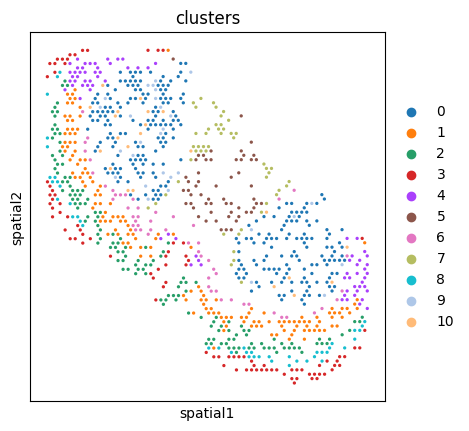

In [19]:
n = 1000  # 要选择的细胞数量
m = 5000   # 要选择的基因数量

# 随机选择n个细胞和m个基因
selected_cells = np.random.choice(adata.obs_names, size=n, replace=False)
selected_genes = np.random.choice(adata.var_names, size=m, replace=False)

# 创建新的AnnData对象
new_adata1 = adata[selected_cells, :][:, selected_genes[0:2500]]
new_adata2 = adata[selected_cells, :][:, selected_genes[2501:5000]]
# 打印新的AnnData对象的维度以验证
print(new_adata.shape)
sc.pl.spatial(new_adata1, img_key = "hires", color="clusters",alpha_img=0)
sc.pl.spatial(new_adata2, img_key = "hires", color="clusters",alpha_img=0)

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import affine_transform
def apply_transformation(coordinates, transformation_matrix):
    """
    对齐次坐标应用几何变换
    """
    transformed_coordinates = np.dot(coordinates, transformation_matrix.T)
    return transformed_coordinates

# 旋转矩阵（45度）
theta = np.radians(45)
cos, sin = np.cos(theta), np.sin(theta)
rotation_matrix = np.array([
    [cos, -sin, 0],
    [sin, cos, 0],
    [0, 0, 1]
])

# 缩放矩阵
scale_factor = 1.5
scaling_matrix = np.array([
    [scale_factor, 0, 0],
    [0, scale_factor, 0],
    [0, 0, 1]
])

# 平移矩阵
translation_matrix = np.array([
    [1, 0, 10],
    [0, 1, 15],
    [0, 0, 1]
])

# 组合变换矩阵
transformation_matrix = np.dot(np.dot(translation_matrix, scaling_matrix), rotation_matrix)

C:\Users\28123\AppData\Local\Temp\ipykernel_20340\2473109997.py:10: ImplicitModificationWarning: Setting element `.obsm['spatial']` of view, initializing view as actual.
  new_adata1.obsm['spatial'] = transformed_coordinates[:, :2]


[[  8148.44549807  54107.6081006 ]
 [-12003.03710558  65052.5604132 ]
 [-15771.56269591  44160.73700965]
 ...
 [ -9535.94154602  67513.29201172]
 [ -8829.54187161  32884.85872346]
 [  -481.08565953  65840.63092083]]


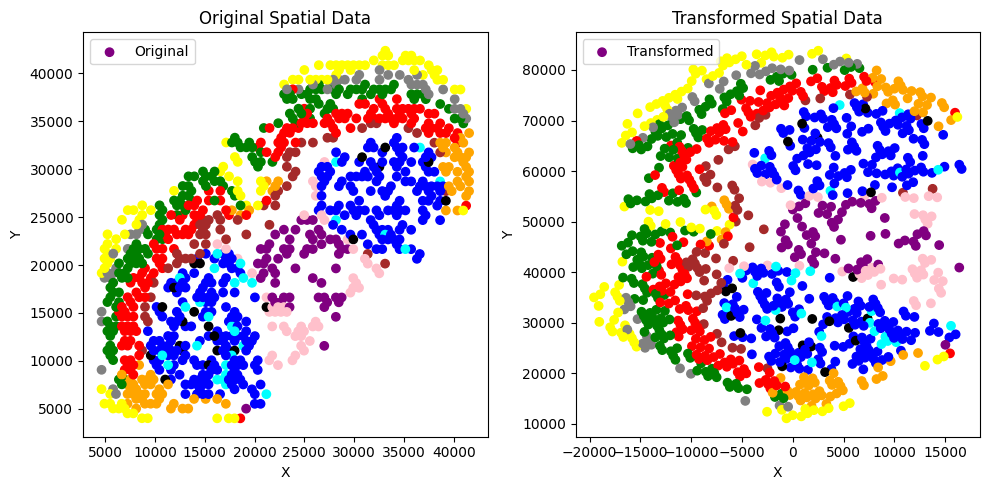

In [21]:
spatial_data = new_adata1.obsm['spatial']

# 添加齐次坐标
homogeneous_coordinates = np.hstack([spatial_data, np.ones((spatial_data.shape[0], 1))])

# 应用变换
transformed_coordinates = apply_transformation(homogeneous_coordinates, transformation_matrix)

# 更新空间数据
new_adata1.obsm['spatial'] = transformed_coordinates[:, :2]

# 打印变换后的空间数据
print(new_adata1.obsm['spatial'])
plt.figure(figsize=(10, 5))

# 原始数据
plt.subplot(1, 2, 1)
plt.scatter(spatial_data[:, 0], spatial_data[:, 1], c=[color_mapping[category] for category in new_adata1.obs["clusters"].astype(int).tolist()], label='Original')
plt.title('Original Spatial Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# 变换后的数据
plt.subplot(1, 2, 2)
plt.scatter(transformed_coordinates[:, 0], transformed_coordinates[:, 1], c=[color_mapping[category] for category in new_adata1.obs["clusters"].astype(int).tolist()], label='Transformed')
plt.title('Transformed Spatial Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.tight_layout()
plt.show()

In [22]:
new_adata1.write("I:\\mutiomics\\Spatial Multimodal Analysis of Transcriptomes and Metabolomes in Tissues\\benchmark\\B1.h5ad")
new_adata2.write("I:\\mutiomics\\Spatial Multimodal Analysis of Transcriptomes and Metabolomes in Tissues\\benchmark\\B2.h5ad")